<a href="https://colab.research.google.com/github/sreehitha177/Employee-Attrition/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

100%|██████████| 50.1k/50.1k [00:00<00:00, 51.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1


In [2]:
!pip install xgboost


In [3]:
#Loading Data

import pandas as pd

df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Data Cleaning and EDA

df.isnull().sum()       #Checking number of null values

attrition_counts = df['Attrition'].value_counts()

df.Attrition.value_counts(normalize=True)

# attrition_counts


,proportion
Attrition,
No,0.838776
Yes,0.161224


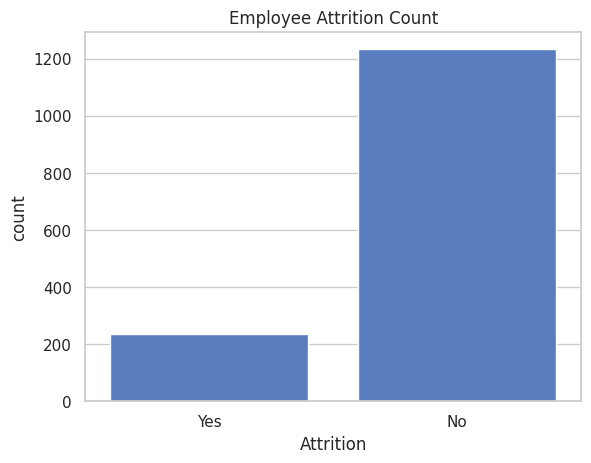

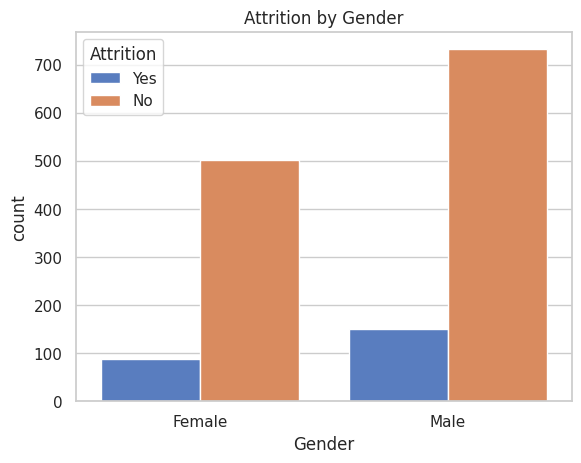

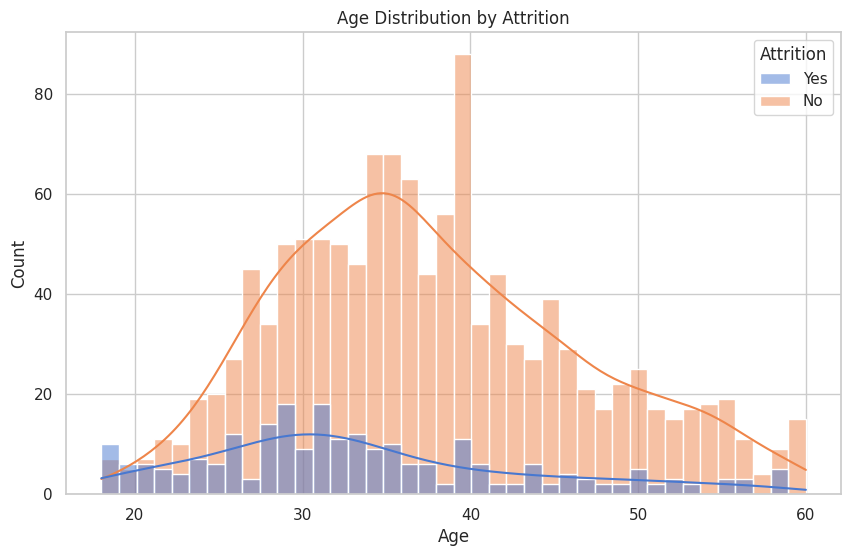

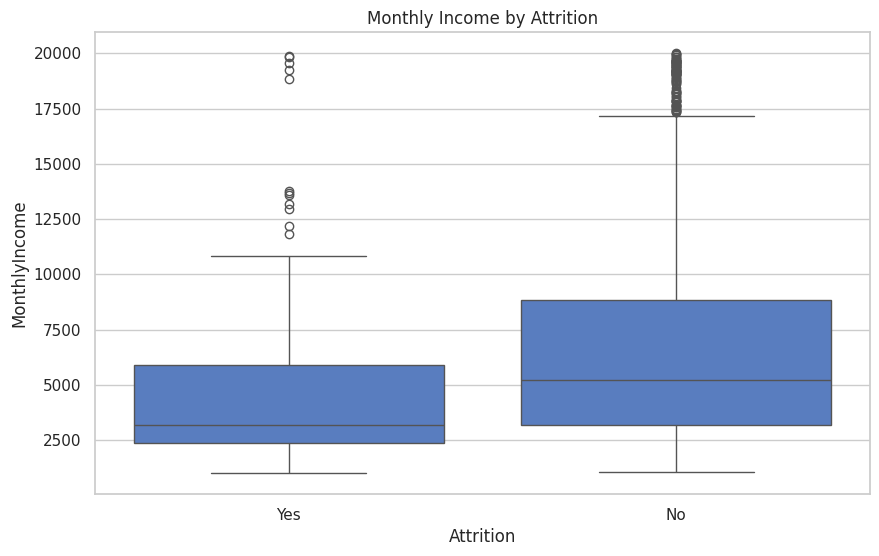

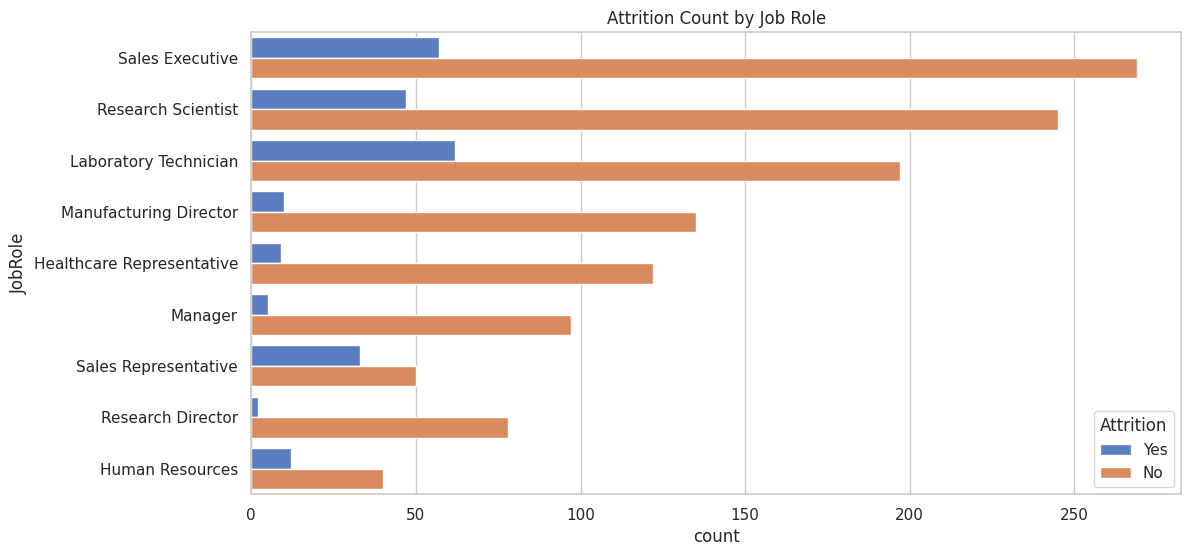

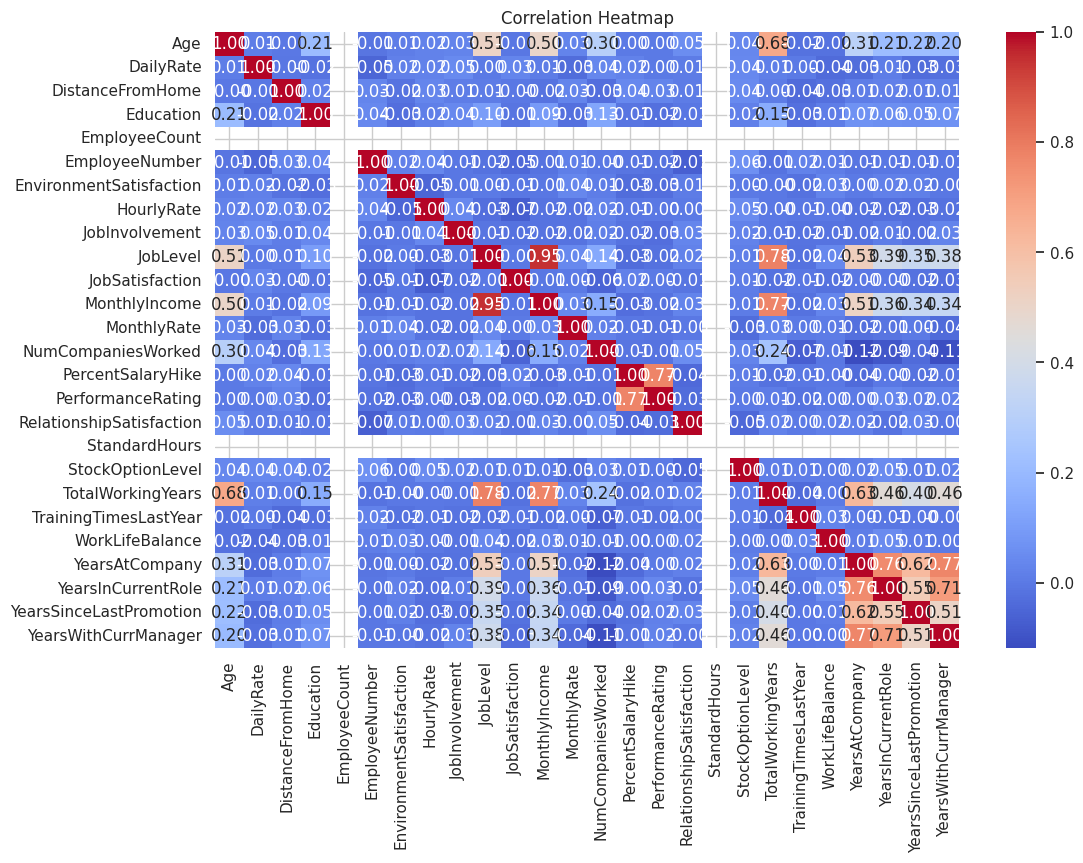

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

sns.countplot(data=df, x='Attrition')
plt.title("Employee Attrition Count")
plt.show()


# plt.bar(attrition_counts.index, attrition_counts.values)
# plt.title("Employee Attrition Count")
# plt.xlabel("Attrition")
# plt.ylabel("Number of Employees")
# plt.show()


# gender_counts = df['Gender'].value_counts()
# attrition_counts = df.groupby(['Gender', 'Attrition']).size()
# print(attrition_counts)


sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title("Attrition by Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition',kde=True,  bins=40)
plt.title("Age Distribution by Attrition")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Monthly Income by Attrition")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title("Attrition Count by Job Role")
plt.show()

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths= 0)
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Dropping Redundant Columns


df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [7]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])



df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8


In [8]:
# One Hot Encoding - convert categorical (text) variables into numerical columns

df = pd.get_dummies(df, columns=[
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus'
], drop_first=True)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,False,True,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,4,1,42,2,3,...,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,2,1,87,4,2,...,False,False,False,True,False,False,False,False,True,False
1468,49,0,1023,2,3,4,1,63,2,2,...,False,False,False,False,False,False,True,False,True,False


In [9]:
print(df.dtypes)


Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

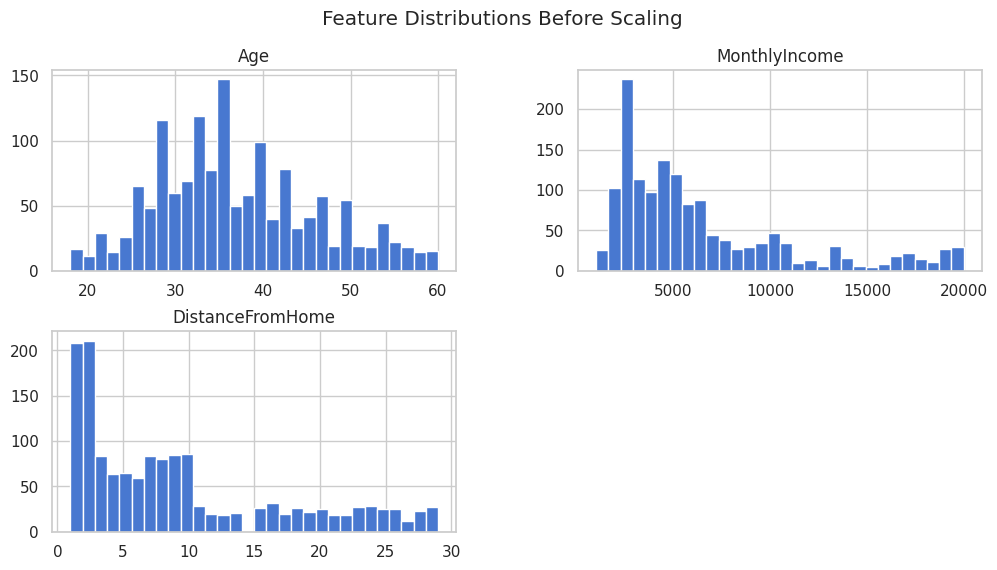

In [10]:
import matplotlib.pyplot as plt

df[['Age', 'MonthlyIncome', 'DistanceFromHome']].hist(bins=30, figsize=(12, 6))
plt.suptitle("Feature Distributions Before Scaling")
plt.show()


In [11]:
# Normalization for the variables which have very different scales


# Min-Max normalization - Scales features to [0, 1].
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df['Age'] = scaler.fit_transform(df[['Age']])
# df['MonthlyIncome'] = scaler.fit_transform(df[['MonthlyIncome']])
# df


from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns that are continuous and should be scaled
# Exclude target and already categorical or encoded ones
numeric_cols_to_scale = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

scaler = MinMaxScaler()
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])




# # StandardScaler - Scales features to have mean = 0 and std = 1.
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df['DistanceFromHome'] = scaler.fit_transform(df[['DistanceFromHome']])
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1,0.715820,0.000000,2,2,0,0.914286,3,2,...,False,False,False,False,False,False,True,False,False,True
1,0.738095,0,0.126700,0.250000,1,3,1,0.442857,2,2,...,False,False,False,False,False,True,False,False,True,False
2,0.452381,1,0.909807,0.035714,2,4,1,0.885714,2,1,...,False,True,False,False,False,False,False,False,False,True
3,0.357143,0,0.923407,0.071429,4,4,0,0.371429,3,1,...,False,False,False,False,False,True,False,False,True,False
4,0.214286,0,0.350036,0.035714,1,1,1,0.142857,3,1,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0,0.559771,0.785714,2,3,1,0.157143,4,2,...,False,True,False,False,False,False,False,False,True,False
1466,0.500000,0,0.365784,0.178571,1,4,1,0.171429,2,3,...,False,False,False,False,False,False,False,False,True,False
1467,0.214286,0,0.037938,0.107143,3,2,1,0.814286,4,2,...,False,False,False,True,False,False,False,False,True,False
1468,0.738095,0,0.659270,0.035714,3,4,1,0.471429,2,2,...,False,False,False,False,False,False,True,False,True,False


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X=df.drop('Attrition',axis=1)
y=df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       255
           1       0.28      0.59      0.38        39

    accuracy                           0.74       294
   macro avg       0.60      0.68      0.61       294
weighted avg       0.84      0.74      0.78       294



In [13]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)

y_rf_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_rf_pred))

rf_report = classification_report(y_test, y_rf_pred, output_dict=True)
rf_report

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.60      0.23      0.33        39

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



{'0': {'precision': 0.8924731182795699,
  'recall': 0.9764705882352941,
  'f1-score': 0.9325842696629213,
  'support': 255.0},
 '1': {'precision': 0.6,
  'recall': 0.23076923076923078,
  'f1-score': 0.3333333333333333,
  'support': 39.0},
 'accuracy': 0.8775510204081632,
 'macro avg': {'precision': 0.7462365591397849,
  'recall': 0.6036199095022624,
  'f1-score': 0.6329588014981273,
  'support': 294.0},
 'weighted avg': {'precision': 0.8536756638139126,
  'recall': 0.8775510204081632,
  'f1-score': 0.8530917985171597,
  'support': 294.0}}

In [15]:
from xgboost import XGBClassifier

# Train XGBoost classifier
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42, scale_pos_weight=6)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_xgb_pred = xgb_model.predict(X_test)
xgb_report = classification_report(y_test, y_xgb_pred)

xgb_report



'              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.93       255\n           1       0.52      0.33      0.41        39\n\n    accuracy                           0.87       294\n   macro avg       0.71      0.64      0.67       294\nweighted avg       0.85      0.87      0.86       294\n'

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(
    scale_pos_weight=6,
    eval_metric='logloss',
    random_state=42
)

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=3, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       255
           1       0.33      0.51      0.40        39

    accuracy                           0.80       294
   macro avg       0.62      0.68      0.64       294
weighted avg       0.84      0.80      0.81       294



In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Retrain the best XGBoost model on balanced data
best_model.fit(X_train_res, y_train_res)
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.71      0.81       255
           1       0.28      0.72      0.40        39

    accuracy                           0.71       294
   macro avg       0.61      0.72      0.61       294
weighted avg       0.85      0.71      0.76       294



In [18]:
import joblib
joblib.dump(best_model, 'xgboost_attrition_model.pkl')


['xgboost_attrition_model.pkl']